<a href="https://www.kaggle.com/code/nikunjsonule/book-recommendation-system?scriptVersionId=100988608" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Book Recommendation System

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# Content
## The Book-Crossing dataset comprises three files

* Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

* Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

* Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

**Importing Libraries**

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

**Book Data**

In [67]:

book_data = pd.read_csv("Books.csv")
book_data.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [68]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [69]:
book_data.shape

(271360, 8)

**Users Data**

In [70]:
users_data= pd.read_csv('Users.csv')
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [71]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [72]:
users_data.shape

(278858, 3)

**Ratings Data**

In [73]:
ratings_data = pd.read_csv("Ratings.csv")
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [74]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [75]:
ratings_data.shape

(1149780, 3)

# Data Preparation (Data Cleaning and Feature Engineering)

## Let's take first book_data dataset

In [76]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')

In [77]:
pd.set_option('display.max_colwidth', None)

In [78]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271358 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image_url_s          271360 non-null  object
 6   image_url_m          271360 non-null  object
 7   image_url_l          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Let's see null values in book_data.

In [79]:
print(book_data.isnull().sum())

isbn                   0
book_title             0
book_author            2
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            3
dtype: int64


In [80]:
# nan values in particular column
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.LZZZZZZZ.jpg
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [81]:
# nan values in particular column
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


We pointed null values in 'book_author' and 'publisher' feature.

Let's look at the unique years to realize the time period as this dataset was created in 2004.

In [82]:
# getting unique value from 'year_of_publication' feature
book_data['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Let's check at the corresponding rows in the dataframe.

In [83]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'DK Publishing Inc']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [84]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


There has to make some correction in three rows as you can see in above output. Let's fix it.

In [85]:
book_data.loc[221678]


,221678
isbn,0789466953
book_title,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley"""
book_author,2000
year_of_publication,DK Publishing Inc
publisher,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg
image_url_s,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg
image_url_l,NaN


In [86]:
book_data.loc[209538]

,209538
isbn,078946697X
book_title,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum"""
book_author,2000
year_of_publication,DK Publishing Inc
publisher,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
image_url_s,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
image_url_l,NaN


In [87]:
book_data.loc[220731]

,220731
isbn,2070426769
book_title,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio"""
book_author,2003
year_of_publication,Gallimard
publisher,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
image_url_s,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
image_url_l,NaN


Let's fix it and make it in correct format as per our dataset.

In [88]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [89]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg


In [90]:
book_data.loc[209538]


,209538
isbn,078946697X
book_title,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
book_author,Michael Teitelbaum
year_of_publication,2000
publisher,DK Publishing Inc
image_url_s,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
image_url_l,NaN


In [91]:
book_data.loc[221678]

,221678
isbn,0789466953
book_title,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
book_author,James Buckley
year_of_publication,2000
publisher,DK Publishing Inc
image_url_s,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg
image_url_l,NaN


In [92]:
book_data.loc[220731]

,220731
isbn,2070426769
book_title,"Peuple du ciel, suivi de 'Les Bergers"
book_author,Jean-Marie Gustave Le ClÃ?Â©zio
year_of_publication,2003
publisher,Gallimard
image_url_s,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg
image_url_m,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
image_url_l,NaN


Now it is been fixed. We can view perfect matching for their corresponding features.

We've seen there are two missing values in the 'publisher' column. Let's take care of that. As we have seen

In [93]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [94]:
# replacing 'Nan' with 'No Mention'
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [95]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [96]:
pd.set_option('display.max_columns', None)
df.head(5)

,publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [97]:
book_data[book_data['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


So we've change the publisher's name from 'NaN' to 'No Mention'.

## Let's see now user_data dataset

In [98]:
# users_data size
print(users_data.shape)

(278858, 3)


In [99]:
# unique value in age
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

There is NaN value in age. We can replace NaN with mean of 'age'.

In [100]:
# replacing nan with average of 'age'
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [101]:
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [102]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan

In [103]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [104]:
users_data['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

As we can see above we don't have any null values for age.

## Now let's take ratings_data dataset

In [105]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [106]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [107]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [108]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

# Data Visualizations

## Book_data dataset

**Analysis no. 1** -

Which are the top Author with number of books ?

Text(0.5, 1.0, 'Top 20 author with number of books')

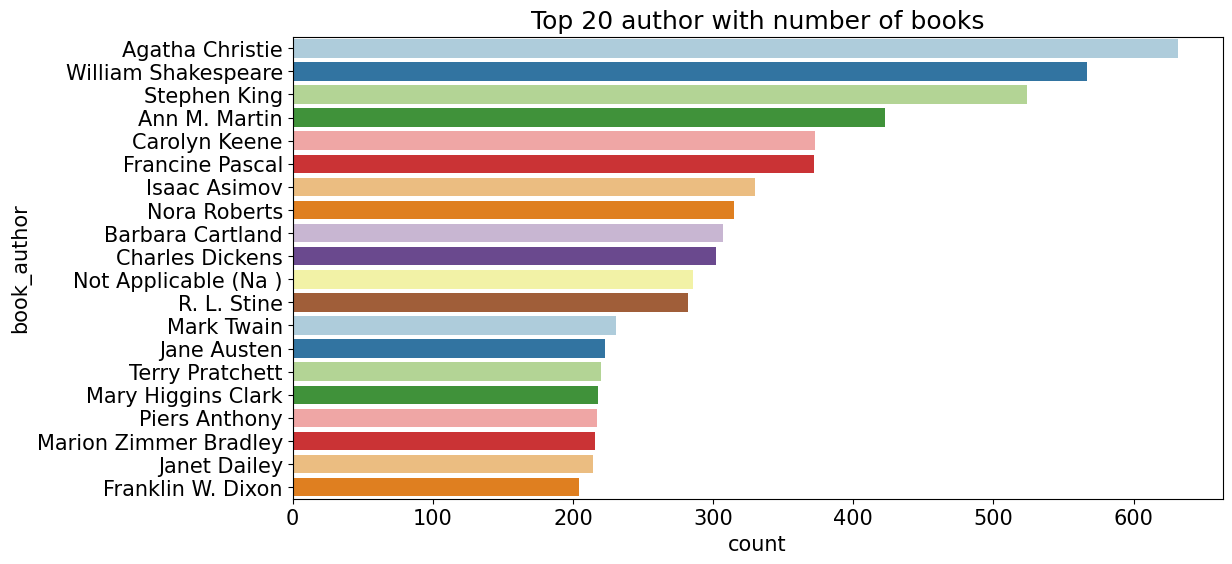

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data,order=book_data['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Agatha Christie is leading at top with more than 600 counts, followed by William Shakespeare. We can plot some hypothesis point :-

* It can happen in some possible cases that Agatha Christie is not a best Author, though Agatha Christie has most number of books as compared to others.
* William Shakespeare is one of the popular Author in the world. Still he doesn't have highest number of books.
* Among all other Authors, it might happen that few of the Author might have some of the best seller books who have millions of copies been sold in world.  

**Analysis no.2** -

 Which are top publishers with published books ?

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

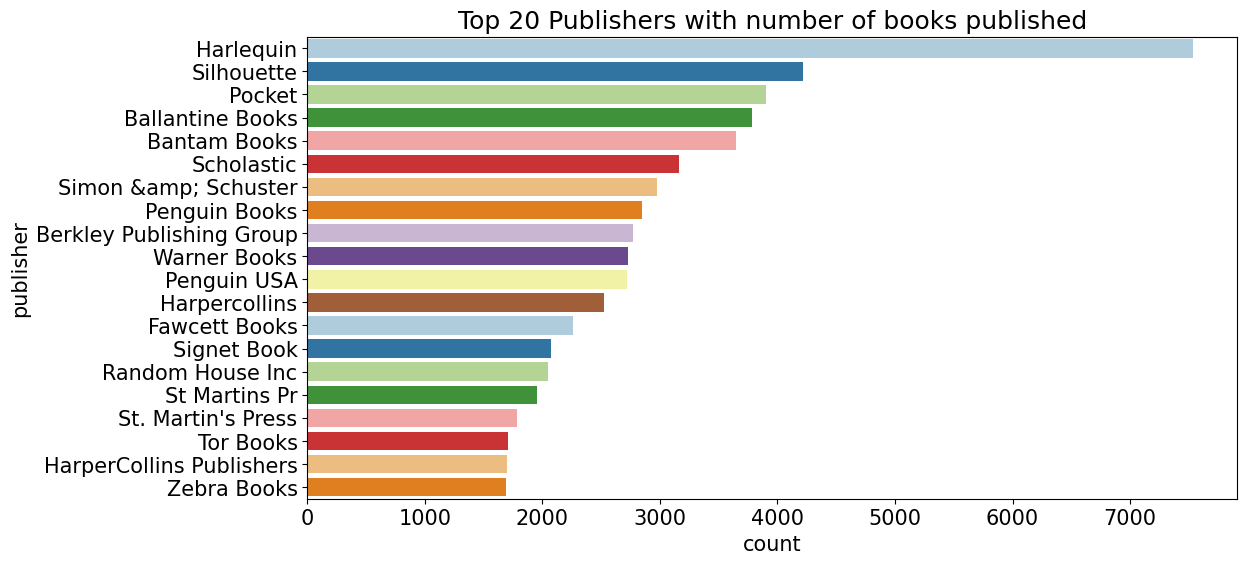

In [110]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

Harlequin has most number of books published, followed by Silhouette. Hypothesis analysis to focus :-

* Some of the top Author's had published their books from Harlequin.
* We can observe Harlequin publiser's marking better performance than any other publishers.
* Penguin Books, Warner Books, Penguin USA, Berkely Publishing Group and many more are among popular publisher's remarking competition with Harlequin.
* Though Penguin Books Publisher has less number of books published but it might happen that only top Author's are approaching towards Penguin Books Publisher.

**Analysis no.3** -

Number of Books published in yearly.

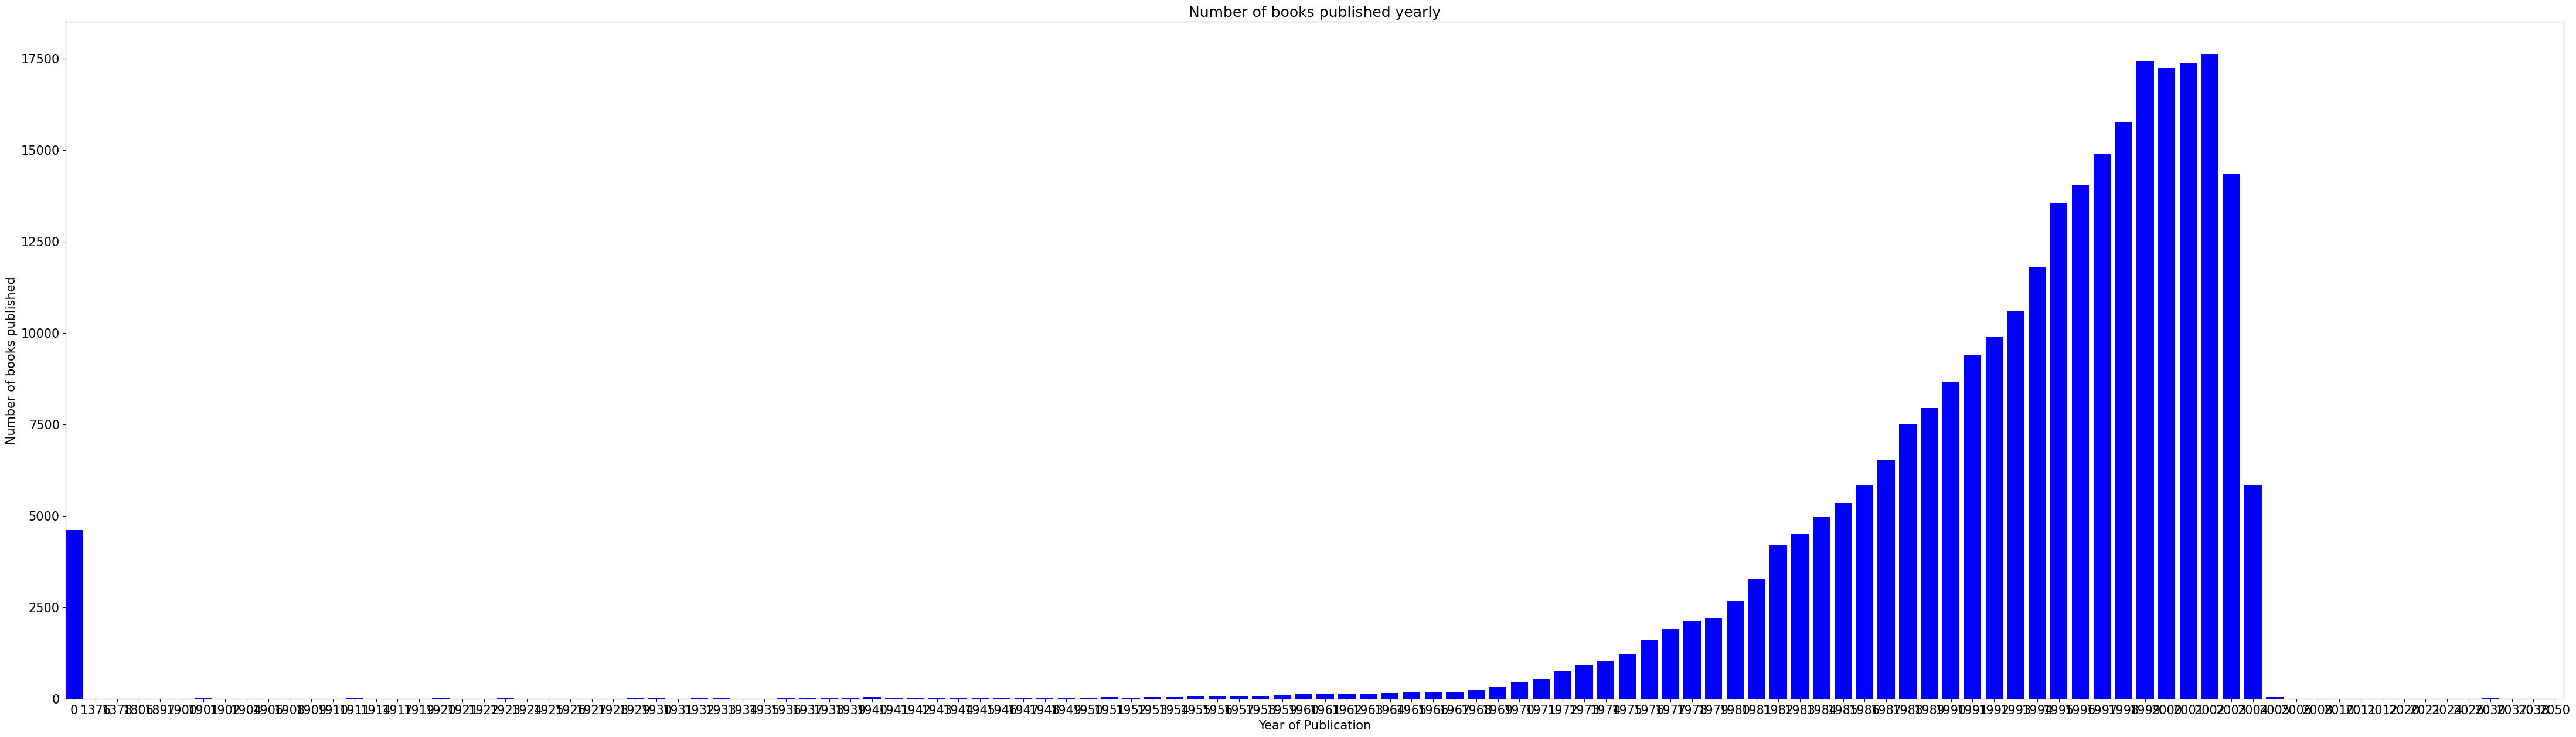

In [111]:
publications = {}
for year in book_data['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [112]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


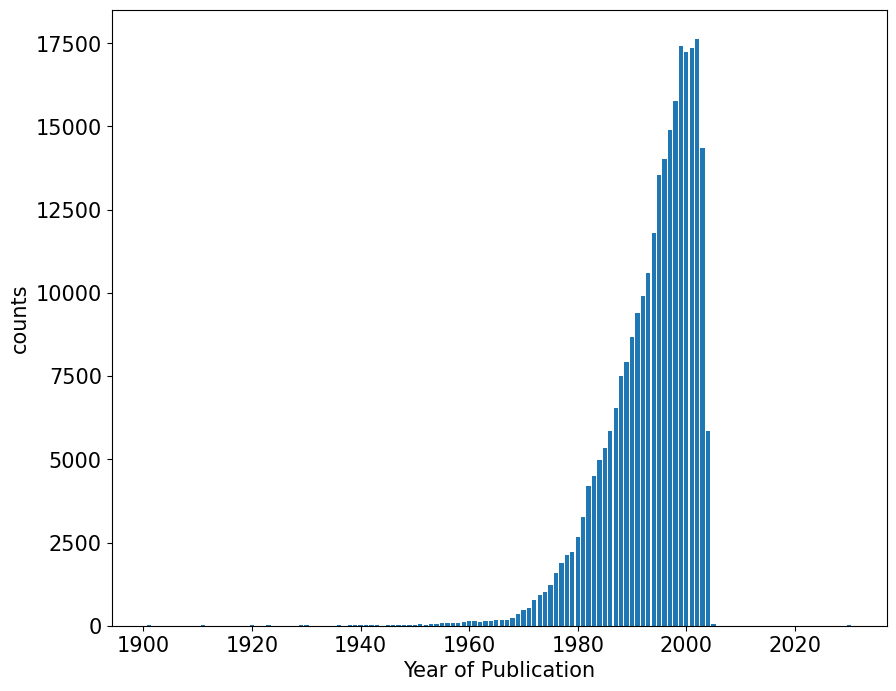

In [113]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5)
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15})
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

So we can see publication years are somewhat between 1950 - 2005 here.The publication of books got vital when it starts emerging from 1950. We can get some hyothesis key points:-

* It might happen people starts to understand the importance of books and gradually got productivity habits in their life.
* Every user has their own taste to read books based on what particular subject Author uses. The subject of writing books got emerge from late 1940 slowly. Till 1970 it has got the opportunity to recommend books to people or users what they love to read.
* The highest peak we can observe is between 1995-2001 year. The user understand what they like to read. Looking towards the raise the recommendation is also increase to understand their interest.

## User_data Dataset

**Analysis no.4** -

Age distributions of users_data

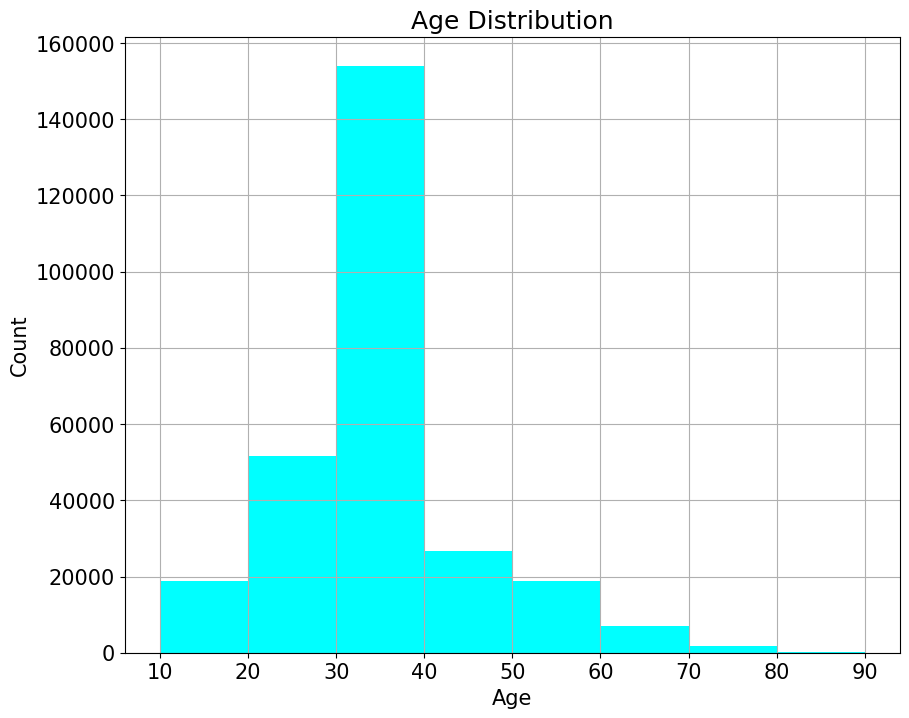

In [114]:
plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Looking towards the users age between 30-40 prefer more and somewhat we can also view between 20-30. Let's make some hypothesis analysis:-

* It is obvious that most of the user books are from Age 30 to 40.
* It might happen that the users are more interested on that subject what Authors are publishing in the market.
* The age group between 20-30 are immensely attracted to read books published by Author.
* We can observe same pitch for Age group between 10-20 and 50-60. There are can be lot of different reasons.

## Ratings_data Dataset

**Analysis No. 5**

What are top 20 books as per number of ratings ?

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

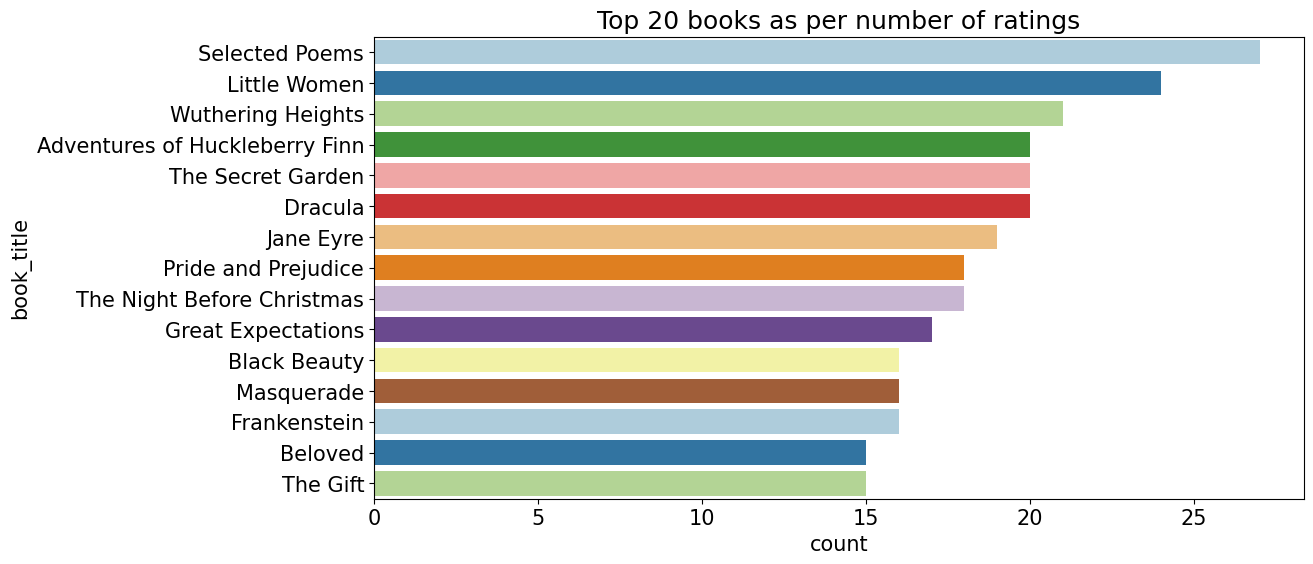

In [115]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data, order=book_data['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

As per ratings "Selected Poems" has been rated most followed by "Little Women".
* Selected Poems are most favourable to users as per ratings.
* Three of the books 'The Secret Garden', 'Dracula','Adventures of Huckleberry Finn'are struggling to compete with each other. Similarly, we can observe in 'Masquerade','Black Beauty','Frankenstein'.


<Axes: xlabel='book_rating', ylabel='count'>

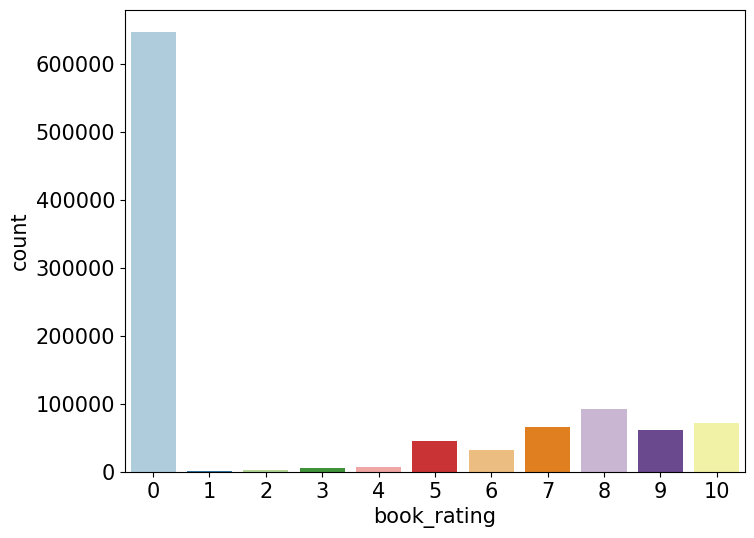

In [116]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Firstly the above ratings are unique ratings from 'ratings_data' and 'books_data' dataset.
 We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0. Let's make some hypothesis assumptions :-

* This countplot shows users have rated 0 the most, which means they haven't rated books at all.
* Still we can see pattern to recognize in ratings from 1-10.
* Mostly the users have rated 8 ratings out of 10 as per books. It might happen that the feedback is positive but not extremely positive as 10 ratings (i.e best books ever).

Text(0.5, 1.0, 'Explicit Ratings')

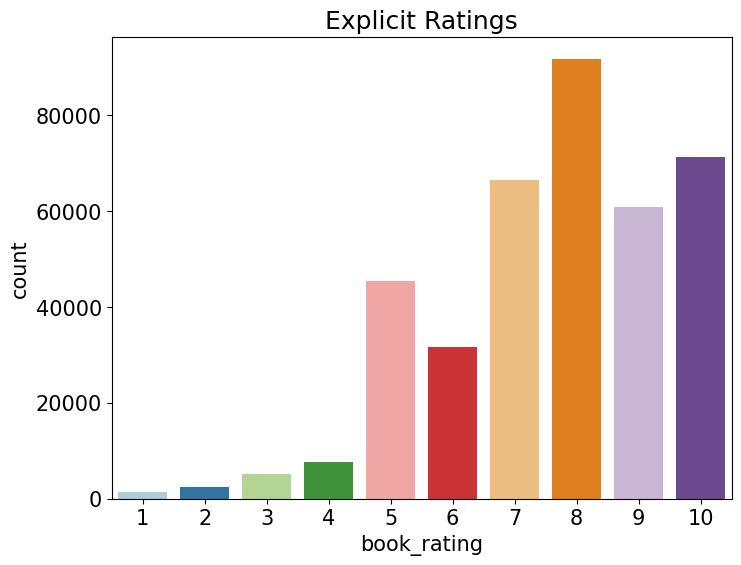

In [117]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

Now this countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times. There can be many assumptions based on ratings of users :-

* Let's take ratings group from 1-4. This can be negative impact for books been published if they have ratings from 1 to 4. It can be issues related to -
      1. Language
      2. Offend by any chapter's incident/paragraph/Author
      3. They've read worst book ever.

* If we think analytical about rating 5, it might happen some same reason as above key points mention.
* For 5 ratings the users might not sure about book ratings whether it's positive or negative impact.
* Let's take ratings group from 6-10. This are positive feedback -
      1. It can happen that not every book is perfect in all desire. So, the user's have decided to rate 8.   
      2. Since 6 ratings is very low among other ratings.
      3. As we can aspect 7 and 8 are average and more ratings from users.
      4. 9 and 10 ratings are top best ratings based on Author's, Publisher's and Books been published.        

# Recommendation System

In [124]:
book_data.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [121]:
users_data.head()

,user_id,location,age
0,1.0,"nyc, new york, usa",34.751434
1,2.0,"stockton, california, usa",18.000000
2,3.0,"moscow, yukon territory, russia",34.751434
3,4.0,"porto, v.n.gaia, portugal",17.000000
4,5.0,"farnborough, hants, united kingdom",34.751434


In [122]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Popularity Based Recommender System
Now let's try to build recommendation system based on popularity (i.e ratings). This recommendations are usually given to every user irrespective of personal characterization.


In [125]:
ratings_with_name = ratings_data.merge(book_data,on='isbn')

In [127]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [128]:
num_rating_df = ratings_with_name.groupby('book_title').count()['book_rating'].reset_index()
num_rating_df.rename(columns={'book_rating':'num_ratings'},inplace=True)
num_rating_df

,book_title,num_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [132]:
ratings_with_name['book_rating'] = pd.to_numeric(ratings_with_name['book_rating'], errors='coerce')
ratings_with_name.dropna(subset=['book_rating'], inplace=True)
avg_rating_df = ratings_with_name.groupby('book_title')['book_rating'].mean().reset_index()
avg_rating_df.rename(columns={'book_rating':'avg_rating'},inplace=True)
avg_rating_df

,book_title,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [134]:
popular_df = num_rating_df.merge(avg_rating_df,on='book_title')
popular_df

,book_title,num_ratings,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [135]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [138]:
popular_df = popular_df.merge(book_data,on='book_title').drop_duplicates('book_title')[['book_title','book_author','image_url_m','num_ratings','avg_rating']]

In [140]:
popular_df['image_url_m'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

## Collaborative Filtering Based Recommender System

In [142]:
x = ratings_with_name.groupby('user_id').count()['book_rating'] > 200
padhe_likhe_users = x[x].index

In [143]:
filtered_rating = ratings_with_name[ratings_with_name['user_id'].isin(padhe_likhe_users)]

In [145]:
y = filtered_rating.groupby('book_title').count()['book_rating']>=50
famous_books = y[y].index

In [147]:
final_ratings = filtered_rating[filtered_rating['book_title'].isin(famous_books)]

In [148]:
pt = final_ratings.pivot_table(index='book_title',columns='user_id',values='book_rating')

In [149]:
pt.fillna(0,inplace=True)

In [150]:
pt

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,29259,29855,30276,30487,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35836,35857,35859,36606,36609,36836,36907,37567,37712,37950,38023,38273,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,43842,44595,44728,46398,47316,48494,49109,49460,49889,50225,51094,51350,51386,51450,51883,52199,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56399,56447,56856,56959,59172,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82831,82893,82926,83637,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88937,89602,91203,91342,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94242,94347,94853,94923,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,100459,100644,100846,100906,101209,101851,101876,102275,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109955,110029,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114868,114988,115002,115003,115120,115490,116599,117251,117539,119575,120093,120548,122429,122793,122881,123790,123883,123981,124078,124079,124363,124487,124942,125039,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131837,131855,132083,133571,133689,133747,133868,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,142093,142524,143175,143253,143415,143792,144531,144555,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151790,151806,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159376,159858,160032,160819,161752,162052,162639,162738,163804,163973,164027,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173632,173684,173835,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183995,184299,185233,185384,186570,187145,187256,187517,188010,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,197775,198621,198699,198711,199416,199772,200226,200674,201017,201290,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,206979,207246,207349,207499,207782,208141,208147,208406,208410,208568,208671,208829,209373,209516,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,216012

In [151]:
from sklearn.metrics.pairwise import cosine_similarity

In [152]:
similarity_scores = cosine_similarity(pt)

In [153]:
similarity_scores.shape

(706, 706)

In [156]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

    data = []
    for i in similar_items:
        item = []
        temp_df = book_data[book_data['book_title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('book_title')['book_title'].values))
        item.extend(list(temp_df.drop_duplicates('book_title')['book_author'].values))
        item.extend(list(temp_df.drop_duplicates('book_title')['image_url_m'].values))

        data.append(item)

    return data

In [157]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [158]:
pt.index[545]

"The Handmaid's Tale"

In [159]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [161]:
book_data.drop_duplicates('book_title')

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,http://images.amazon.com/images/P/0449906736.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0449906736.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0449906736.01.LZZZZZZZ.jpg
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg


In [162]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(book_data,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

# Conclusion

* Among top 20 Authors the highest number of books has been hold by Agatha Christie. Agatha Christie is leading at top with more than 600 counts, followed by William Shakespeare.

* Harlequin has most number of books published, followed by Silhouette.

* Number of Books published in yearly are between 1950 - 2005.

* Most of the users are between 30-40 prefer more books and somewhat we can also view between 20-30.

* As per ratings "Selected Poems" has been rated most followed by "Little Women". The countplot shows users have rated 0 the most, which means they haven't rated books at all.

* The top 10 books recommendation as per ratings with top "The lovely Bones: A novel" with 707 book ratings. But this are not based on some recommendation system. They are top 10 books as per ratings.

* As we perform by cosine similarity in recommendation system it gives 7.94 RMSE score and SVD improved score it to 1.63 RSME score by Singular Value Decomposition model (SVD).

* The evaluation metrics for SVD is best RMSE score for all dataset (i.e users_data, ratings_data and books_data).

* As model based approach was best to signify and at last we got top 10 recommended books and ratings respectively.